In [1]:
import os

os.chdir("..")

In [2]:
import torch
from diffusers.pipelines import FluxPipeline
from src.flux.condition import Condition
from PIL import Image

from src.flux.generate import generate, seed_everything

In [3]:
pipe = FluxPipeline.from_pretrained(
    "black-forest-labs/FLUX.1-schnell", torch_dtype=torch.bfloat16
)
pipe = pipe.to("cuda")
pipe.load_lora_weights(
    "Yuanshi/OminiControl",
    weight_name=f"omini/subject_512.safetensors",
    adapter_name="subject",
)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


  0%|          | 0/8 [00:00<?, ?it/s]

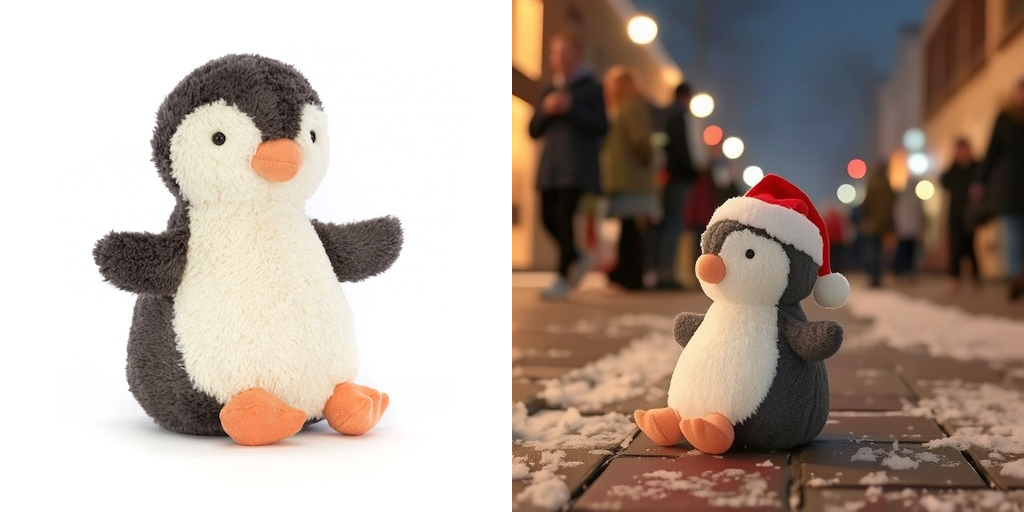

In [4]:
image = Image.open("assets/penguin.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

prompt = "On Christmas evening, on a crowded sidewalk, this item sits on the road, covered in snow and wearing a Christmas hat."


seed_everything(0)

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(image, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

  0%|          | 0/8 [00:00<?, ?it/s]

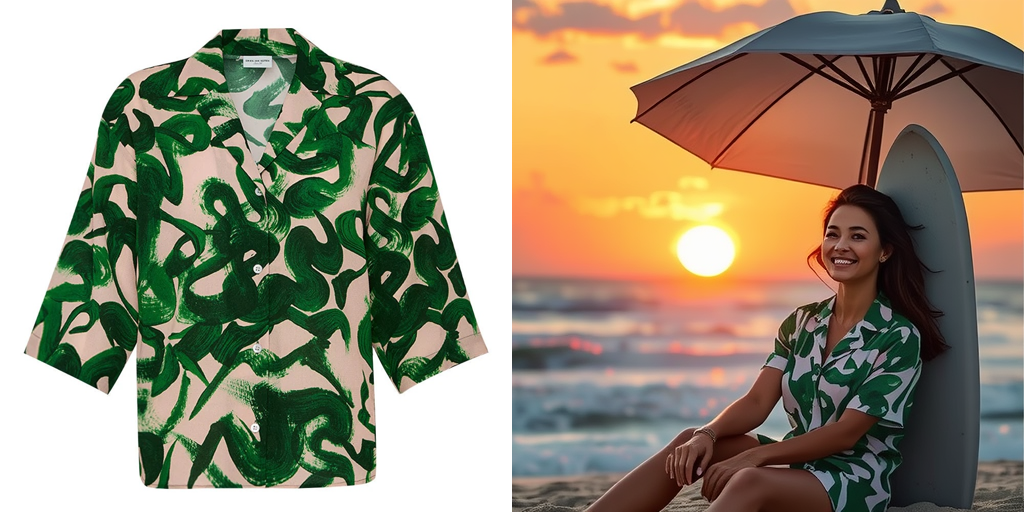

In [5]:
image = Image.open("assets/tshirt.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

prompt = "On the beach, a lady sits under a beach umbrella. She's wearing this shirt and has a big smile on her face, with her surfboard hehind her. The sun is setting in the background. The sky is a beautiful shade of orange and purple."


seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

  0%|          | 0/8 [00:00<?, ?it/s]

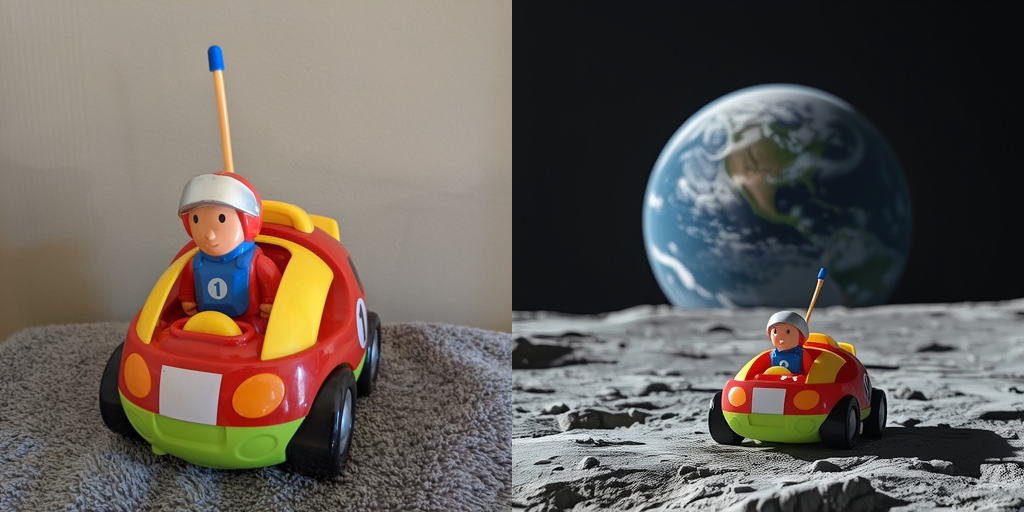

In [6]:
image = Image.open("assets/rc_car.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

prompt = "A film style shot. On the moon, this item drives across the moon surface. The background is that Earth looms large in the foreground."

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

  0%|          | 0/8 [00:00<?, ?it/s]

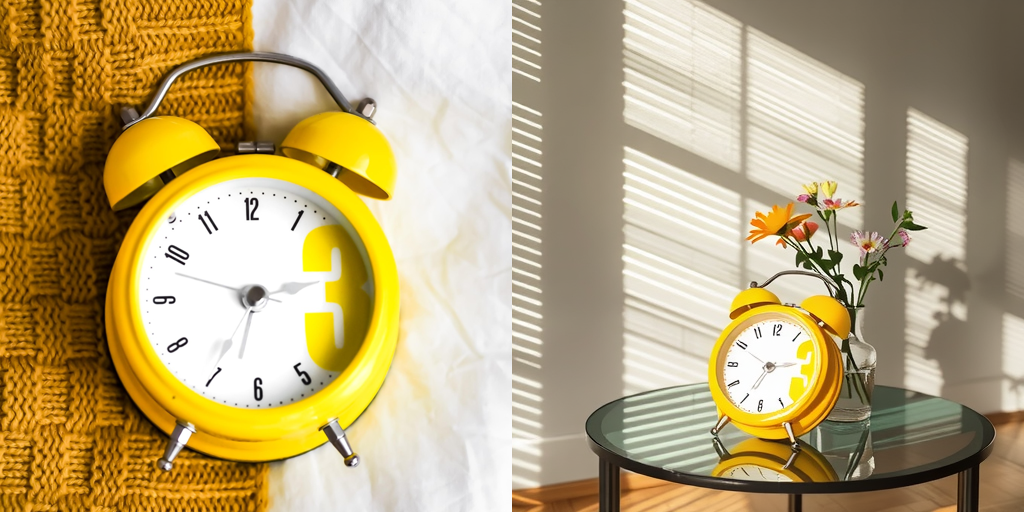

In [7]:
image = Image.open("assets/clock.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

prompt = "In a Bauhaus style room, this item is placed on a shiny glass table, with a vase of flowers next to it. In the afternoon sun, the shadows of the blinds are cast on the wall."

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image

  0%|          | 0/8 [00:00<?, ?it/s]

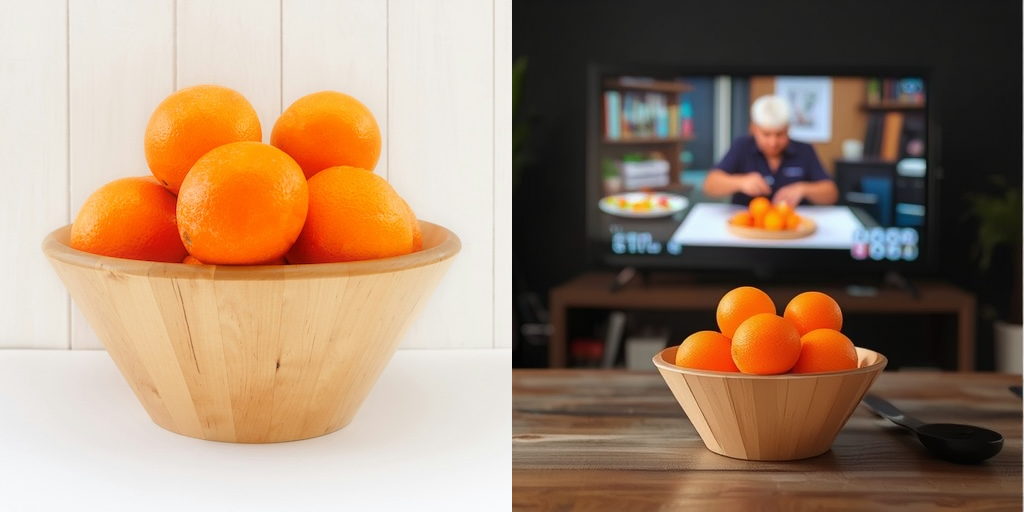

In [8]:
image = Image.open("assets/oranges.jpg").convert("RGB").resize((512, 512))

condition = Condition("subject", image, position_delta=(0, 32))

prompt = "A very close up view of this item. It is placed on a wooden table. The background is a dark room, the TV is on, and the screen is showing a cooking show."

seed_everything()

result_img = generate(
    pipe,
    prompt=prompt,
    conditions=[condition],
    num_inference_steps=8,
    height=512,
    width=512,
).images[0]

concat_image = Image.new("RGB", (1024, 512))
concat_image.paste(condition.condition, (0, 0))
concat_image.paste(result_img, (512, 0))
concat_image